<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ScatterPlots" data-toc-modified-id="ScatterPlots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ScatterPlots</a></span></li></ul></div>

# Käfer / Raupen 

## ScatterPlots

In [1]:
# Bibliothek pandas importieren
import pandas as pd

In [2]:
# Datensatz einlesen
# Die Datei "Käfer.csv" ist eine Datei, in der Datensätze zeilenweise aufgeführt sind.
# Jede Spalte ist durch ein Semikolon (";") getrennt.

# df_käfer ist eine eigene Variable und steht für "dataframe Käfer"
df_kaefer = pd.read_csv('Kaefer.csv', sep=';')

# zeige den Datensatz "df_käfer" an
display(df_kaefer)

,Breite,Länge,Insekt
0,0.48,0.38,Marienkäfer
1,0.32,0.74,Raupe
2,0.49,0.27,Marienkäfer
3,0.58,0.46,Marienkäfer
4,0.11,0.58,Raupe
...,...,...,...
195,0.57,0.37,Marienkäfer
196,0.10,0.54,Raupe
197,0.39,0.81,Raupe
198,0.56,0.29,Marienkäfer


In [3]:
#Bibliotheken plotly und cufflinks zur Datenvisualisierung importieren
from plotly.offline import iplot
import plotly.graph_objects as go
import cufflinks as cf
from ipywidgets import interactive
from PyTree import ClassificationTree as ct
cf.go_offline()

In [4]:
#Ein quadratsiches Layout für plotly-Graphiken wird definiert 
square_layout = go.Layout(xaxis={'title':'Breite','range':[-0.01,1.01]},
                   yaxis={'title':'Länge','range':[-0.01,1.01]},
                   height=600,
                   width=600)

In [5]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree1 = ct.DecisionTree(target = 'Insekt', data = df_kaefer)

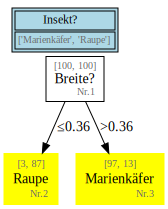

In [6]:
schwellWert = 0.36
tree1.manual_split(attribute = 'Breite',  threshold = schwellWert, node_nr = 1)

fehlersumme_raupe = tree1.get_target_distribution(node_nr = 2)['Marienkäfer'] 
fehlersumme_kaefer = tree1.get_target_distribution(node_nr = 3)['Raupe'] 
fehlersumme = fehlersumme_raupe + fehlersumme_kaefer

df_kaefer.iplot('scatter', mode = 'markers',  #layout = square_layout,
                   x = 'Breite',
                   y = 'Länge',
                   categories = 'Insekt',
                   vline=schwellWert, 
                   dimensions=[600,600], 
                   title="Schwellwert: " + str(schwellWert) + "; dann " + str(fehlersumme) + " Fehler"
               )
tree1.print_tree()

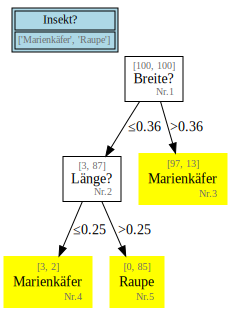

In [45]:
tree1.manual_split(attribute = 'Breite',  threshold = 0.36, node_nr = 1)
tree1.manual_split(attribute = 'Länge',  threshold = 0.25, node_nr = 2)

tree1.print_tree()